#  As Movie Budgets are Increased, Do Review Scores and Movie Popularity Correlate?
**Authors: James Allen & Maitland Huffman** 

## Project Summary
In this project, our goal is to determine if there is a positive, or any correlation with regards to movie budgets, popularity and their review scores. Using the full tmbd movies dataset, this will allow us to use classification to determine any correlation between the three variables of movie budgets and movie review scores.

## Problem Statement 

Does increasing the budget of a movie increase said movie's review score and/or popularity, or is there no significant correlation between the three aspects?

## Dataset 
The dataset that we will use for our machine learning project is the full tmbd movies dataset located [here](https://huggingface.co/datasets/ada-datadruids/full_tmdb_movies_dataset).

Instances: The dataset contains 1,142,342 rows, allowing for in-depth analysis across a wide range of films.
Attributes: The dataset features a variety of attributes, including:

- Budget
- Revenue
- Release date
- Genres
- Production companies
- Cast and crew information
- User ratings
- Critical reviews
- Box office performance

## Exploratory Data Analysis 

<Complete for **Project Progress**>
* What EDA graphs you are planning to use? 
* Why? - Add figures if any

In our EDA, we plan to drop all non float data, such as if the movie released, so that we can test our problem statement head on. Some of the graphs that we will implement are correlation matricies, 

<Expand and complete for the **Project Submission**>
* Describe the methods you explored (usually algorithms, or data wrangling approaches). 
  * Include images. 
* Justify methods for feature normalization selection and the modeling approach you are planning to use. 

In [8]:
# A1: Importing libraries for data manipulation, plotting, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

sns.set(style='whitegrid')

In [ ]:
# A2: Load the movie dataset (make sure CSV is in same folder or update path)
df = pd.read_csv("dataset.csv")
print(df.shape)

(1142342, 24)


In [5]:
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [10]:
# A3: Drop rows where budget or revenue are zero and remove missing values
df = df[(df['budget'] > 0) & (df['revenue'] > 0)]
df = df[df['vote_average'].notna() & df['popularity'].notna()]
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

id                         0
title                      0
vote_average               0
vote_count                 0
status                     0
release_date            1834
revenue                    0
runtime                    0
adult                      0
backdrop_path           3659
budget                     0
homepage                9716
imdb_id                 3326
original_language          0
original_title             0
overview                1339
popularity                 0
poster_path             1727
tagline                 4084
genres                  1708
production_companies    2895
production_countries    2814
spoken_languages        2406
keywords                3843
dtype: int64

In [11]:
# A4: Add log-transformed versions of budget and revenue + ROI + score classes
df['budget_log'] = np.log1p(df['budget'])
df['revenue_log'] = np.log1p(df['revenue'])
df['roi'] = (df['revenue'] - df['budget']) / df['budget']

def classify_score(score):
    if score < 5:
        return 'low'
    elif score < 7:
        return 'medium'
    else:
        return 'high'

df['score_class'] = df['vote_average'].apply(classify_score)
df['score_class'].value_counts()

score_class
medium    6562
low       4169
high      3594
Name: count, dtype: int64

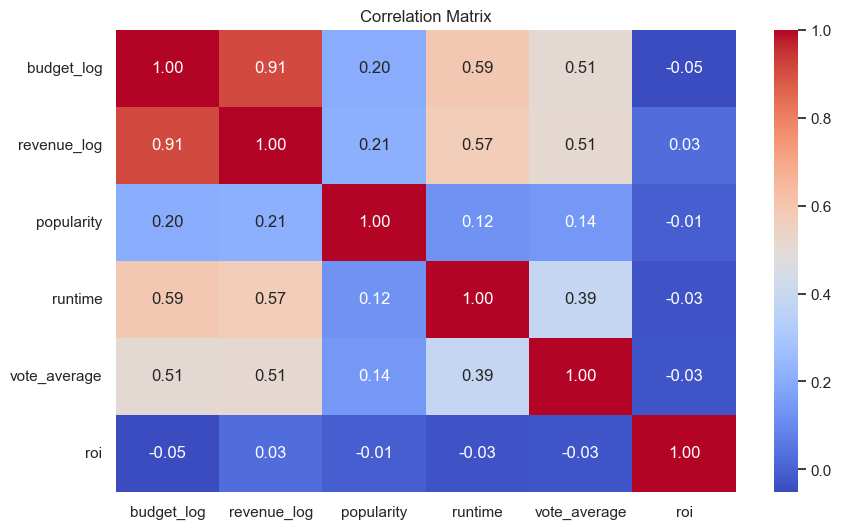

In [12]:
# A5: Correlation heatmap to visualize relationships
corr_features = ['budget_log', 'revenue_log', 'popularity', 'runtime', 'vote_average', 'roi']

plt.figure(figsize=(10, 6))
sns.heatmap(df[corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Data Preprocessing 

<Complete for *Project Progress*>
* Have you considered Dimensionality Reduction or Scaling? 
  * If yes, include steps here.  
* What did you consider but *not* use? Why? 

<Expand and complete for **Project Submission**>

In [18]:
# A6: Train/test split and random forest model to predict score_class
features = ['budget_log', 'revenue_log', 'popularity', 'runtime', 'roi']
X = df[features]
y = df['score_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 251  191  277]
 [  79  623  132]
 [ 131   62 1119]]
              precision    recall  f1-score   support

        high       0.54      0.35      0.43       719
         low       0.71      0.75      0.73       834
      medium       0.73      0.85      0.79      1312

    accuracy                           0.70      2865
   macro avg       0.66      0.65      0.65      2865
weighted avg       0.68      0.70      0.68      2865



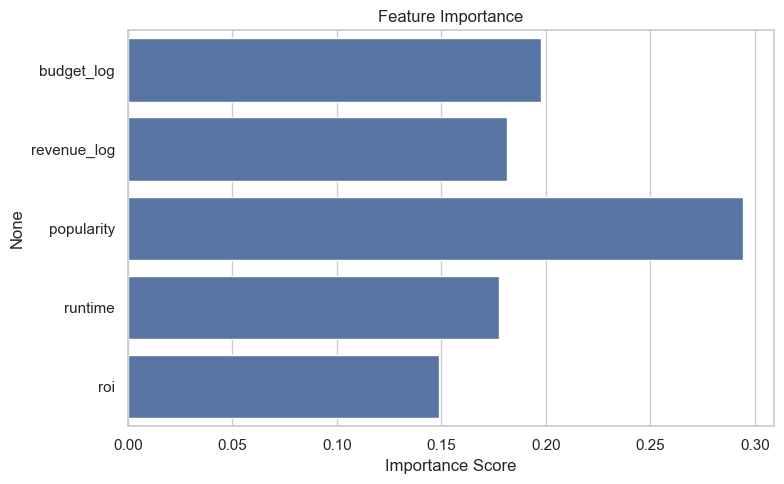

In [14]:
# A7: Plotting which features were most important to the model
importances = clf.feature_importances_
feat_names = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

## Machine Learning Approaches

<Complete for **Project Progress**>

* What is your baseline evaluation setup? Why? 
* Describe the ML methods that you consider using and what is the reason for their choice? 
   * What is the family of machine learning algorithms you are using and why?

<Expand and complete for **Project Submission**>

* Describe the methods/datasets (you can have unscaled, selected, scaled version, multiple data farmes) that you ended up using for modeling. 

* Justify the selection of machine learning tools you have used
  * How they informed the next steps? 
* Make sure to include at least twp models: (1) baseline model, and (2) improvement model(s).  
   * The baseline model  is typically the simplest model that's applicable to that data problem, something we have learned in the class. 
   * Improvement model(s) are available on Kaggle challenge site, and you can research github.com and papers with code for approaches.  

## Experiments 

< **Project Progress** should include experiments you have completed thus far.>

<**Project Submission** should only contain final version of the experiments. Please use visualizations whenever possible.>
* Describe how did you evaluate your solution 
  * What evaluation metrics did you use? 
* Describe a baseline model. 
  * How much did your model outperform the baseline?  
* Were there other models evaluated on the same dataset(s)? 
  * How did your model do in comparison to theirs? 
  * Show graphs/tables with results 
  * Present error analysis and suggestions for future improvement. 

## Conclusion
<Complete for the **Project Submission**>
* What did not work? 
* What do you think why? 
* What were approaches, tuning model parameters you have tried? 
* What features worked well and what didn't? 
* When describing methods that didn't work, make clear how they failed and any evaluation metrics you used to decide so. 
* How was that a data-driven decision? Be consise, all details can be left in .ipynb